### METRICS

## Базовые метрики классификации

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data_classification = pd.DataFrame({
    "y_true": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    "y_pred": [1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
})

data_regression = pd.DataFrame({
    "y_true": [3, 1, 2, 7, 1],
    "y_pred": [2.5, 0.5, 2, 8, 1.5]
})

#### Accuracy
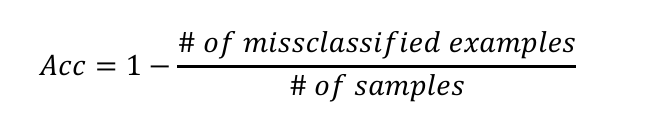
- Неустойчиво к несбалансированным датасетам
- Легко интерпретируемая
- Важность разного рода ошибок одинакова

In [4]:
def accuracy(y_true, y_pred):
    return sum(y_true == y_pred) / len(y_true)

print("Accuracy:", accuracy(data_classification["y_true"], data_classification["y_pred"]))

Accuracy: 0.7


### Confusion matrix
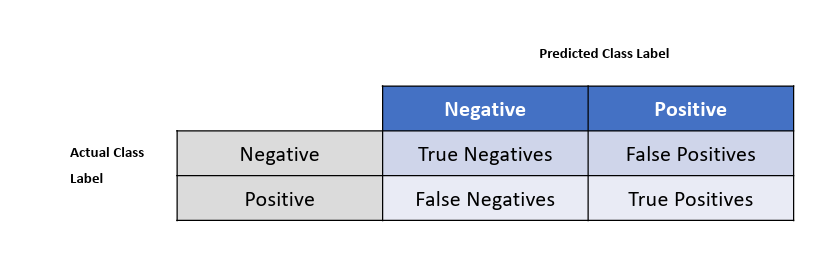
- FP - ошибка первого рода
- FN - ошибка второго рода


Confusion Matrix:
                  Predicted Positive  Predicted Negative
Actual Positive                   4                   1
Actual Negative                   2                   3


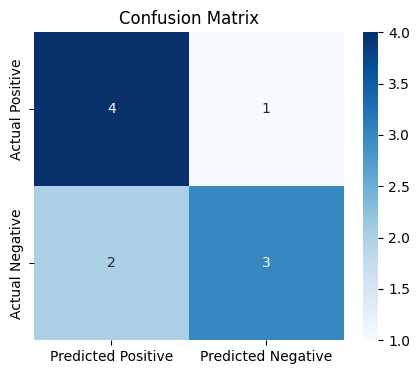

In [7]:
def confusion_matrix(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    return pd.DataFrame([[tp, fn], [fp, tn]], index=["Actual Positive", "Actual Negative"], columns=["Predicted Positive", "Predicted Negative"])

print("Confusion Matrix:\n", confusion_matrix(data_classification["y_true"], data_classification["y_pred"]))

cm = confusion_matrix(data_classification['y_true'], data_classification['y_pred'])

# Рисуем heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Precision
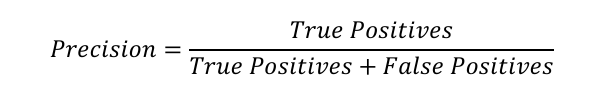
- Показывает, какая доля предсказанных моделью «положительных» объектов реально положительные.
- Полезна, когда ошибочные положительные предсказания дорогие. 
- Пример: спам-фильтр. Ложно помеченный нормальный email — критично.

In [8]:
def precision(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0
print("Precision:", precision(data_classification["y_true"], data_classification["y_pred"]))

Precision: 0.6666666666666666


### Recall
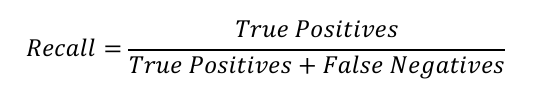
- Показывает, какая доля всех реальных положительных объектов была найдена моделью
- Полезен, когда важно не пропускать положительные объекты.
- Пример: медицина, болезнь = 1. Пропустить больного опаснее, чем ложный тревожный сигнал.


In [10]:
def recall(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

print("Recall:", recall(data_classification["y_true"], data_classification["y_pred"]))

Recall: 0.8


### Fbeta score
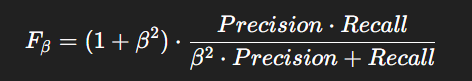
- β < 1 → больше внимание к Precision

- β > 1 → больше внимание к Recall

- β = 1 → обычный F1-score
- Почему гармоническое, а не среднее арифметическое?

-- Гармоническое среднее даёт более сильное влияние меньшего значения.

-- Если Precision низкий, а Recall высокий → F1 низкий.

-- Если обе метрики высокие → F1 высокий.


In [14]:
def fbeta(y_true, y_pred, beta=1):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return (1 + beta**2) * p * r / (beta**2 * p + r) if (p + r) > 0 else 0

print("F1 Score:", fbeta(data_classification["y_true"], data_classification["y_pred"], beta=1))



F1 Score: 0.7272727272727272


### AUC-ROC
- ROC (Receiver Operating Characteristic) — кривая, показывающая связь между True Positive Rate и False Positive Rate при разных порогах классификации.
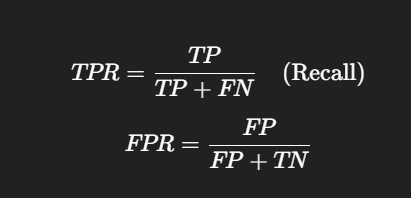
- AUC (Area Under Curve) — площадь под ROC-кривой.
-- Диапазон: 0–1
-- Интерпретация: вероятность, что случайно выбранный положительный объект будет иметь более высокий score, чем случайно выбранный отрицательный.
-- AUC = 0.5 → случайная модель
-- AUC = 1 → идеальная модель
- Независима от дисбаланса классов — потому что TPR и FPR нормированы.

AUC-ROC: 1.0


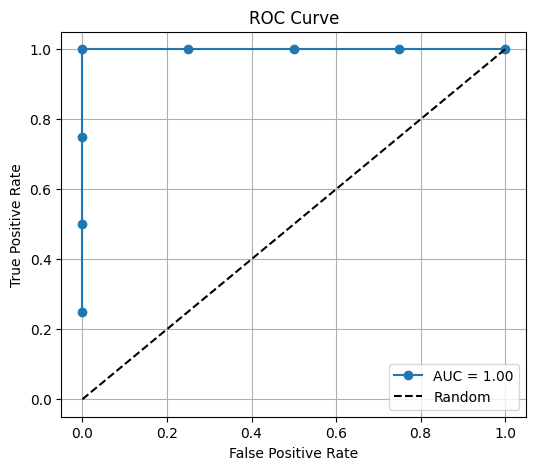

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def auc_roc(y_true, y_scores):
    thresholds = np.unique(y_scores)
    tpr_list = []
    fpr_list = []
    
    P = sum(y_true == 1)
    N = sum(y_true == 0)
    
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        tp = sum((y_true == 1) & (y_pred == 1))
        fp = sum((y_true == 0) & (y_pred == 1))
        
        tpr = tp / P if P > 0 else 0
        fpr = fp / N if N > 0 else 0
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    fpr_list, tpr_list = zip(*sorted(zip(fpr_list, tpr_list)))
    auc = np.trapz(tpr_list, fpr_list)
    return auc, fpr_list, tpr_list

y_true = np.array([1, 0, 1, 0, 1, 0, 1, 0])
y_scores = np.array([0.9, 0.1, 0.8, 0.4, 0.95, 0.2, 0.85, 0.3])

auc_value, fpr, tpr = auc_roc(y_true, y_scores)
print("AUC-ROC:", auc_value)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, marker='o', label=f'AUC = {auc_value:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


## Базовые метрики Регрессии

### Mean Absolute Error (MAE)
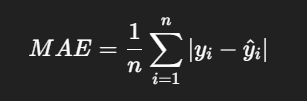
- Показывает, на сколько в среднем предсказания модели отклоняются от реальных значений, без учёта направления ошибки.
- MAE менее чувствителен к выбросам, чем MSE/RMSE, потому что не возводит ошибки в квадрат.

In [17]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

print("Mean Absolute Error (MAE):", mae(data_regression["y_true"], data_regression["y_pred"]))

Mean Absolute Error (MAE): 0.5


### Mean Squared Error (MSE)
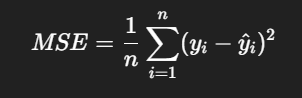
- Показывает, насколько сильно в среднем предсказания модели отклоняются от истинных значений, при этом большие ошибки "наказываются" сильнее, потому что они возводятся в квадрат.

In [18]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

print("Mean Squared Error (MSE):", mse(data_regression["y_true"], data_regression["y_pred"]))

Mean Squared Error (MSE): 0.35


### Root Mean Squared Error (RMSE)
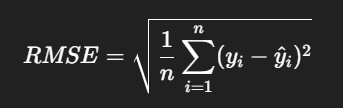
- Измеряет среднюю ошибку предсказания в тех же единицах, что и целевая переменная, при этом большие ошибки имеют большее влияние из-за квадрата.
- В отличие от MSE, RMSE выражен в той же шкале, что и целевая переменная, поэтому легче понять размер ошибки.
- RMSE наследует свойство MSE — сильно реагирует на большие ошибки, поэтому удобно для задач, где большие ошибки критичны.

In [19]:
def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

print("Root Mean Squared Error (RMSE):", rmse(data_regression["y_true"], data_regression["y_pred"]))

Root Mean Squared Error (RMSE): 0.5916079783099616


### Mean Absolute Percentage Error (MAPE)
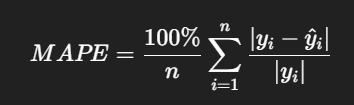
- Показывает, на сколько процентов в среднем отклоняются предсказания модели от реальных значений.
- Чувствительна к нулям, иначе простая в интерпретации.

In [23]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Mean Absolute Percentage Error (MAPE):", mape(data_regression["y_true"], data_regression["y_pred"]))

Mean Absolute Percentage Error (MAPE): 26.190476190476193


### R²
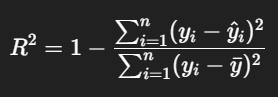
- Показывает, какую долю вариации целевой переменной объясняет модель.
- R² = 1 → модель идеально объясняет данные
- R² = 0 → модель предсказывает не лучше среднего
- R² < 0 → модель хуже среднего
- Не всегда хороша для несбалансированных данных или сильно нелинейных моделей.

In [25]:
def R2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total) if ss_total > 0 else 0

print("R²:", R2(data_regression["y_true"], data_regression["y_pred"]))

R²: 0.9294354838709677


### Huber Loss
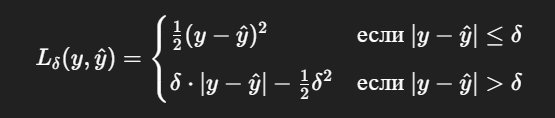
- Малые ошибки → как MSE (квадрат) → гладкая оптимизация
- Большие ошибки → как MAE (абсолютная) → не слишком наказываем выбросы
- Используется, когда в данных есть редкие экстремальные значения.

In [26]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss)) 

print("Huber Loss:", huber_loss(data_regression["y_true"], data_regression["y_pred"], delta=1.0))

Huber Loss: 0.175


### Quantile loss
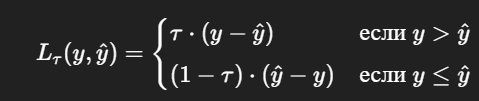
- Ошибка взвешивается в зависимости от того, выше или ниже истинного значения предсказание.
- Позволяет модели учиться прогнозировать не среднее, а конкретный квантиль распределения.
- Ошибки выше предсказания и ниже предсказания учитываются с разным весом.
- Позволяет адаптироваться под задачи, где переоценка и недооценка имеют разную цену.

In [31]:
def quantile_loss(y_true, y_pred, quantile=0.5):
    error = y_true - y_pred
    return np.mean(np.maximum(quantile * error, (quantile - 1) * error))

print("Quantile Loss:", quantile_loss(data_regression["y_true"], data_regression["y_pred"], quantile=0.5))

Quantile Loss: 0.25


## Метрики ранжирования

### Kendall tau distance
- Cчитает, сколько пар элементов в этих двух списках расположены по-разному.

- Если порядок одинаков → пара согласованная

- Если порядок разный → пара несогласованная

- Kendall Tau Distance = число несогласованных пар / общее число пар

In [33]:
def kendall_tau_distance(rank1, rank2):
    n = len(rank1)
    discordant = 0
    for i in range(n):
        for j in range(i+1, n):
            if (rank1[i] - rank1[j]) * (rank2[i] - rank2[j]) < 0:
                discordant += 1
    total_pairs = n * (n - 1) / 2
    return discordant / total_pairs

print(kendall_tau_distance([1,2,3,4], [1,3,2,4]))  
print(kendall_tau_distance([1,2,3], [3,2,1]))     


0.16666666666666666
1.0


### Precision/recall at k 
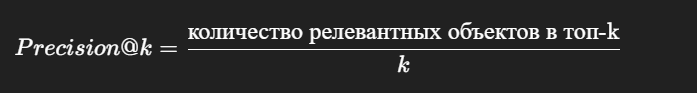
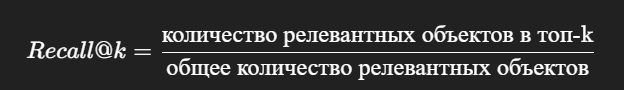
- Также можно и с Fbeta score

In [35]:
y_true = ["A", "C", "D"]  # релевантные
y_pred = ["A", "B", "C", "E", "F"]  # рекомендации
def precision_at_k(y_true, y_pred, k):
    y_pred_k = y_pred[:k]
    relevant_and_recommended = len(set(y_true) & set(y_pred_k))
    return relevant_and_recommended / k if k > 0 else 0

print("Precision at 2:", precision_at_k(y_true, y_pred, 2))

def recall_at_k(y_true, y_pred, k):
    y_pred_k = y_pred[:k]
    relevant_and_recommended = len(set(y_true) & set(y_pred_k))
    return relevant_and_recommended / len(y_true) if len(y_true) > 0 else 0 

print("Recall at 2:", recall_at_k(y_true, y_pred, 2))

Precision at 2: 0.5
Recall at 2: 0.3333333333333333


### Average Precision at k (AP@k)
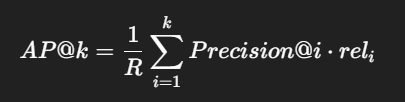
- Показывает насколько хорошо ранжирование «собирает» релевантные объекты по мере просмотра списка.

In [38]:
y_true = ["A", "C", "D"]  # релевантные
y_pred = ["A", "B", "C", "E", "F"]  # рекомендации
def average_precision_at_k(y_true, y_pred, k):
    y_pred_k = y_pred[:k]
    score = 0.0
    num_relevant = 0
    for i in range(len(y_pred_k)):
        if y_pred_k[i] in y_true:
            num_relevant += 1
            score += num_relevant / (i + 1)
    return score / min(len(y_true), k) if len(y_true) > 0 else 0

print("Average Precision at 2:", average_precision_at_k(y_true, y_pred, 3))

Average Precision at 2: 0.5555555555555555


### Mean Average Precision at k(MAP@k)
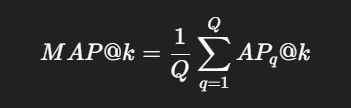
- Усреднённый Average Precision@k (AP@k) по всем пользователям/запросам.
- Показывает насколько хорошо система ранжирует релевантные объекты в топ-k.

In [46]:
y_true = [["A", "C"], ["X"]]
y_pred = [["A", "B", "C", "D"], ["Y", "X", "Z"]]

def mean_average_precision(y_true_list, y_pred_list, k):
    ap_scores = [average_precision_at_k(y_true, y_pred, k) for y_true, y_pred in zip(y_true_list, y_pred_list)]
    return np.mean(ap_scores) if ap_scores else 0

print("Mean Average Precision at 2:", mean_average_precision(y_true, y_pred, 2))

Mean Average Precision at 2: 0.5


### Hit Rate(Hits@k)
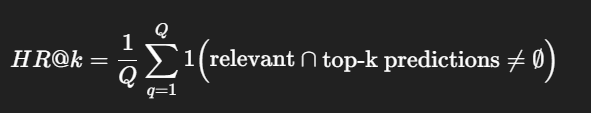
- Показывает есть ли хотя бы один релевантный объект среди топ-k рекомендаций

In [49]:
def hit_rate(y_true, y_pred, k):
    y_pred_k = y_pred[:k]
    return 1.0 if set(y_true) & set(y_pred_k) else 0.0
print("Hit Rate at 3:", hit_rate(["A", "C"], ["B", "C", "D", "E"], 2))

Hit Rate at 3: 1.0


### NDCG@k (Normalized Discounted Cumulative Gain) 
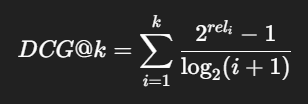
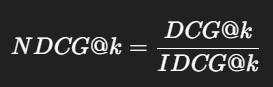
- В рекомендациях и поиске важно не только, чтобы релевантные объекты были в списке, но и чтобы они были как можно выше.
- Учитывает позицию релевантных объектов: чем ближе к началу списка, тем больше награда.

In [50]:
def ngcg(y_true, y_pred, k):
    def dcg(relevances):
        return sum((2**rel - 1) / np.log2(idx + 2) for idx, rel in enumerate(relevances))
    
    y_pred_k = y_pred[:k]
    relevances = [1 if item in y_true else 0 for item in y_pred_k]
    ideal_relevances = sorted(relevances, reverse=True)
    
    dcg_value = dcg(relevances)
    idcg_value = dcg(ideal_relevances)
    
    return dcg_value / idcg_value if idcg_value > 0 else 0.0

print("NDCG at 3:", ngcg(["A", "C", "D"], ["A", "B", "C", "E", "F"], 3))

NDCG at 3: 0.9197207891481876


### Reciprocal rank
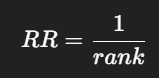
- Обратный ранг первого релевантного объекта в списке.
- Чем выше релевантный объект в списке, тем больше метрика.


In [ ]:
def reciprocal_rank(y_true, y_pred):
    for idx, item in enumerate(y_pred):
        if item in y_true:
            return 1 / (idx + 1)
    return 0.0
print("Reciprocal Rank:", reciprocal_rank(["O", "B"], ["B", "C", "D", "E"]))

Reciprocal Rank: 0.0


### Expected reciprocal rank(ERR@k)
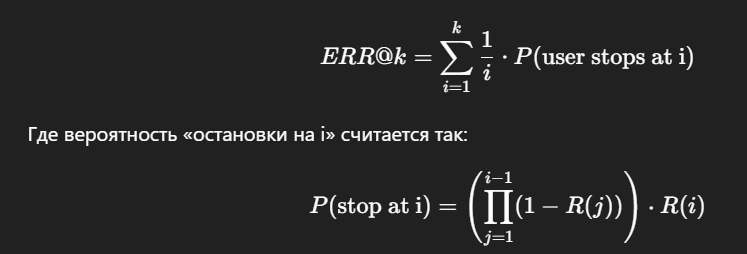
- MRR смотрит только на позицию первого релевантного объекта.
- Но пользователи не всегда останавливаются на первом релевантном — они могут пролистывать дальше.
- ERR учитывает вероятность, что пользователь «насытится» (остановится) на каком-то объекте.
- То есть ERR моделирует «процесс просмотра списка результатов».

In [55]:
def expected_reciprocal_rank(y_true, y_pred, k):
    p = 1.0
    err = 0.0
    for i in range(min(k, len(y_pred))):
        if y_pred[i] in y_true:
            r = 1.0
        else:
            r = 0.0
        err += p * r / (i + 1)
        p *= (1 - r)
    return err

print("Expected Reciprocal Rank at 3:", expected_reciprocal_rank(["A", "C"], ["B", "C", "D", "E"], 3))

Expected Reciprocal Rank at 3: 0.5


## Метрики для генерации текста

### BLEU (Bilingual Evaluation Understudy)

- Сравнивает совпадение n-грам предсказанного текста с референсом.

- Часто используется в машинном переводе, но не учитывает семантику.

### ROUGE (Recall-Oriented Understudy for Gisting Evaluation)

- ROUGE-N → совпадение n-грам

- ROUGE-L → совпадение наибольшей общей последовательности (Longest Common Subsequence)

- Часто для суммаризации текстов.


### METEOR

- Учитывает синонимы, стемминг и точность/полноту.

- Более «человеческая» метрика по сравнению с BLEU.

## Онлайн метрики


### CTR — Click-Through Rate
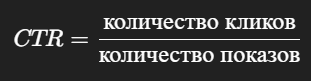
- Используется для рекламы, рекомендаций, поиска.

- Показывает, насколько пользователи заинтересованы в показанном элементе.

- Быстрая, простая метрика, но не учитывает качество клика (пользователь мог быстро уйти).

### Conversion Rate (CR)
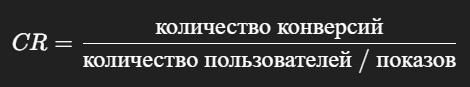
- Конверсия = целевое действие (покупка, регистрация, подписка).

- В e-commerce и SaaS CR важнее CTR, потому что клики сами по себе не приносят доход.


### Average Revenue Per User (ARPU)
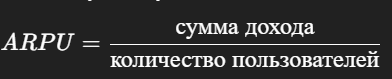
- В онлайн-рекомендациях/рекламе измеряет доход на пользователя.
- Можно считать в день, месяц, сессию.

### Retention Rate
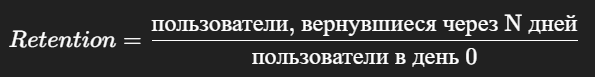
- Показатель удержания пользователей.
- Важен для оценки долгосрочной ценности системы.

### Engagement / Session Metrics
- Session length — время на сайте или в приложении

- Number of actions per session — клики, просмотры, лайки

- Измеряет активность и вовлечённость пользователей.

### Bounce Rate / Drop-off
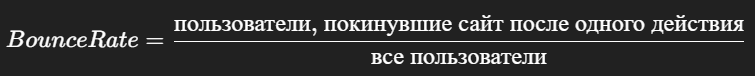
- Используется для оценки качества страницы или интерфейса.
- В рекомендациях может показывать, что система показывает нерелевантные рекомендации.